# Question 1

Seed =6

when significance is 0.05  

--- Beginning KS Test ---  
d_plus: 0.080000  
d_minus: 0.190000  
d_max: 0.190000  
Critical Value: 0.410000  
Choice: Accept.  
--- Beginning Chi Squared Test ---  
Instance bins: 203 181 221 178 224 194 214 193 219 173  
Chi Squared Result: 16.210000  
Critical Value: 18.300000  
Choice: Accept.  

when significance is 0.01  

--- Beginning KS Test ---  
d_plus: 0.080000  
d_minus: 0.190000  
d_max: 0.190000  
Critical Value: 0.490000  
Choice: Accept.  
--- Beginning Chi Squared Test ---  
Instance bins: 203 181 221 178 224 194 214 193 219 173  
Chi Squared Result: 16.210000  
Critical Value: 23.200000  
Choice: Accept.  

# conclusion

* The random number generator used in the C program passes both the Kolmogorov-Smirnov (KS) test and the Chi-Squared test for uniformity at both 0.05 and 0.01 significance levels.
* These tests suggest that, based on the given significance levels, the generated random numbers exhibit characteristics consistent with a uniform distribution, meeting the criteria for randomness

# Question 2

Bins: 97 115 107 110 87 105 93 88 106 92  
Chi Squared result: 8.700000, expected: 16.900000  
Accept  

## Discuss whether this algorithm is a viable random number generator or not:


The implemented random number generator algorithm, based on a linear congruential generator (LCG) in C, shows certain limitations that question its viability for broader applications. While it successfully passes a chi-squared test for uniformity, the algorithm relies on the rand() function for initial values, introducing seed dependency and potential biases. The range of generated numbers is restricted to [0.0, 1.0), limiting its versatility for applications requiring different ranges or specific distribution properties. To enhance viability, considerations such as allowing user-specified LCG parameters, improving seed generation, and exploring established random number generators with proven statistical properties are essential. In its current form, the algorithm may lack the robustness necessary for critical applications

# Question 3

a=11, m=16, x_0=7 : [7, 13, 15, 5]  
a=11, m=16, x_0=8 : [8]  
a=7, m=16, x_0=7 : [7, 1]  
a=7, m=16, x_0=8 : [8]  

## Inference Drawn

The analysis of linear congruential cycles for various parameter configurations reveals that certain combinations result in cycles of varying lengths, indicating sensitivity to initial values and parameter choices in the generation of pseudo-random sequences.

## Question 4

Expressions for F(x):

For $-\infty < x \leq 0$:
$$
\int_{-\infty}^x e^{2y} \, dy = \frac{e^{2x}}{2}
$$

For $0 < x < \infty$:

$$
\int_{-\infty}^0 e^{2y} \, dy + \int_0^x e^{-2y} \, dy = 1 - \frac{e^{-2x}}{2}
$$

Getting $x$ in terms of $R$.

* When $-\infty < x \leq 0$ then $0 < R \leq \frac{1}{2}$.
* When $0 < x < \infty$ then $\frac{1}{2} < R < 1$.

$$
x = \frac{1}{2} \ln{(2R)} \quad \text{if } 0 < R \leq \frac{1}{2}
$$

$$
x = -\frac{1}{2} \ln{(2-2R)} \quad \text{if } \frac{1}{2} < R < 1
$$



# Question 5


$$ 1 + (M+1)m \le N $$
$$ 1 + (M+1)3 \le 20 $$
$$ M \le \frac{20 - 1}{3} - 1 $$
$$ M = \frac{16}{3} \approx 5 $$

Every third number are: 
* 0.594, 
* 0.055, 
* 0.262, 
* 0.442, 
* 0.227, 
* 0.825, 
* 0.929

$$ s = (0.594)(0.055) + (0.055)(0.262) + (0.262)(0.442) + (0.442)(0.227) + (0.227)(0.825) + (0.825)(0.929) $$

The correlation coefficient $( \rho_{13} )$ is calculated as the difference between one-sixth of the variable $( s )$ and 0.25. This results in $\rho_{13}$ = -0.047180. The standard deviation $( \sigma_{\rho_{13}} )$ of $( \rho_{13} )$ is determined by the formula $$(\frac{ \sqrt{13(5)+7} }{ 12(5+1) } = \frac{1}{6\sqrt{2}} )$$.

Observationally, lower random numbers tend to be succeeded by higher ones, and vice versa.

To standardize $ \rho_{13}( Z_0 )$, it is divided by the standard deviation $( \sigma_{\rho_{13}} )$. The result is $( Z_0 = -0.400338 )$.


# Question 6

Generated bins: [394, 246, 135, 96, 40, 33, 13, 19, 12, 5, 7]
Normalized bins: [0.394, 0.246, 0.135, 0.096, 0.04, 0.033, 0.013, 0.019, 0.012, 0.005, 0.007]


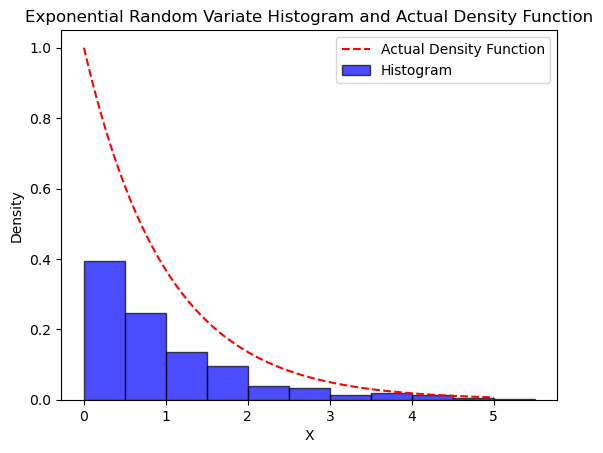

In [7]:
import numpy as np
import matplotlib.pyplot as plt

SEED = 1
MEAN = 1.0
INCREMENT_SIZE = 0.5
SAMPLES = 1000
BINS = 11

def exponential(mean):
    num = np.random.rand()
    return (-1.0 * mean) * np.log(num)

def generate_histogram(samples, bins, increment_size):
    histogram, bin_edges = np.histogram(samples, bins=np.arange(0, (BINS+1) * INCREMENT_SIZE, INCREMENT_SIZE))
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot histogram
    plt.bar(bin_midpoints, histogram / SAMPLES, width=INCREMENT_SIZE, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

    # Plot the actual exponential density function
    x = np.linspace(0, (BINS-1) * INCREMENT_SIZE, 100)
    y = np.exp(-x)
    plt.plot(x, y, 'r--', label='Actual Density Function')

    plt.title('Exponential Random Variate Histogram and Actual Density Function')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

def main():
    np.random.seed(SEED)  # Seed
    values = [exponential(MEAN) for _ in range(SAMPLES)]
    bins = [0] * BINS

    for value in values:
        for index in range(BINS):
            if value < (index + 1) * INCREMENT_SIZE:
                bins[index] += 1
                break
        else:
            # If we didn't break, put this in the last bin
            bins[-1] += 1

    print("Generated bins:", bins)

    # Normalize
    normalized = [bin_count / SAMPLES for bin_count in bins]
    print("Normalized bins:", normalized)

    # Create and plot histogram
    generate_histogram(values, BINS, INCREMENT_SIZE)

if __name__ == "__main__":
    main()

